In [9]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
color = sns.color_palette()
%matplotlib inline
matplotlib.style.use('ggplot')

plt.rcParams['figure.figsize'] = [12, 6]

from datetime import timedelta
import datetime as dt

from IPython.display import display

# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
train, test = data_utils.load_dataset(op_scope='4')
print 'train: {}, test: {}'.format(train.shape, test.shape)
# trip_durations = train['trip_duration']
# del train['trip_duration']
# conbined_data = pd.concat([train, test])

train: (1458644, 89), test: (625134, 88)


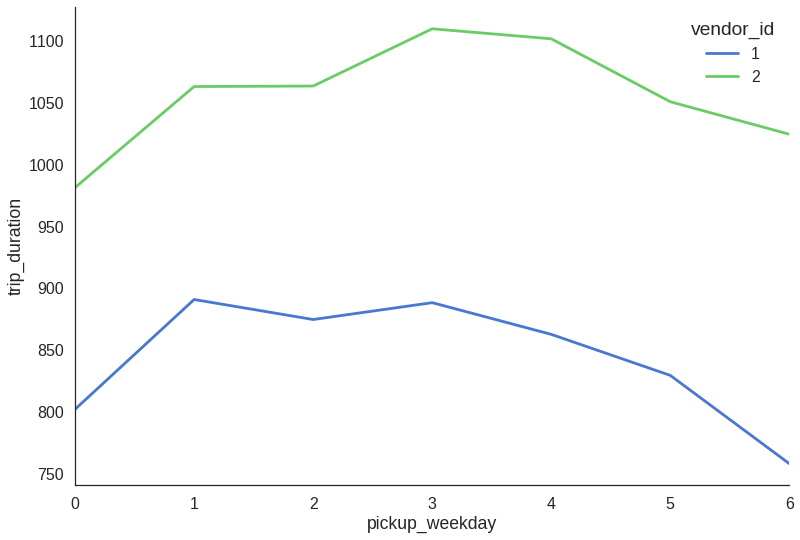

In [11]:
summary_wdays_avg_duration = pd.DataFrame(train.groupby(['vendor_id','pickup_weekday'])['trip_duration'].mean())
summary_wdays_avg_duration.reset_index(inplace = True)

summary_wdays_avg_duration['unit']=1
sns.set(style="white", palette="muted", color_codes=True)
sns.set_context("poster")
sns.tsplot(data=summary_wdays_avg_duration, time="pickup_weekday", unit = "unit", condition="vendor_id", value="trip_duration")
sns.despine(bottom = False)

In [47]:
groupby_df = train.groupby(['vendor_id','pickup_weekday'])['trip_duration'].mean().reset_index()

In [48]:
groupby_df

,vendor_id,pickup_weekday,trip_duration
0,1,0,802.055682
1,1,1,890.880158
2,1,2,874.681476
3,1,3,888.328737
4,1,4,862.664437
5,1,5,829.457755
6,1,6,758.001309
7,2,0,981.530758
8,2,1,1063.262921
9,2,2,1063.668127


In [60]:
def vendor_id_pickup_weekday(vendor_id, pickup_weekday):
    return groupby_df[groupby_df['vendor_id'] == vendor_id][groupby_df['pickup_weekday'] == pickup_weekday]['trip_duration'].values[0]


In [61]:
train['groupby_vi_pweekdat_trip_duration'] = train.loc[:10, :].apply(lambda row: vendor_id_pickup_weekday(row['vendor_id'], row['pickup_weekday']), axis=1)
test['groupby_vi_pweekdat_trip_duration'] = test.loc[:10, :].apply(lambda row: vendor_id_pickup_weekday(row['vendor_id'], row['pickup_weekday']), axis=1)

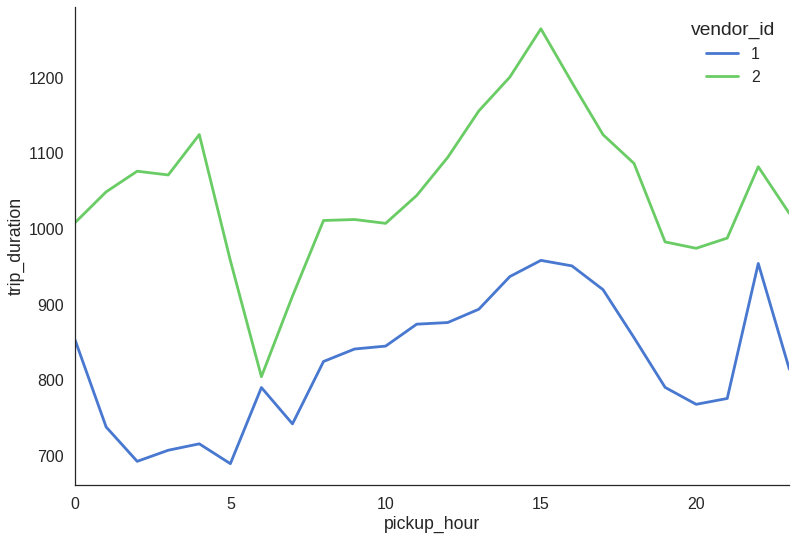

In [63]:
summary_wdays_avg_duration = pd.DataFrame(train.groupby(['vendor_id','pickup_hour'])['trip_duration'].mean())
summary_wdays_avg_duration.reset_index(inplace = True)

summary_wdays_avg_duration['unit']=1
sns.set(style="white", palette="muted", color_codes=True)
sns.set_context("poster")
sns.tsplot(data=summary_wdays_avg_duration, time="pickup_hour", unit = "unit", condition="vendor_id", value="trip_duration")
sns.despine(bottom = False)